In [1]:
import numpy as np
import matplotlib.pyplot as pl
import json
import pandas as pd

In [2]:
experiment = 'historical'
nyears = 165
model = 'CanESM5'

In [3]:
T = {}
for p1 in range(1,26):
    run = 'r%si1p1f1' % p1
    data = pd.read_csv('../data_output/cmip6/%s/%s/%s.csv' % (model, run, experiment))
    T[run] = data['tas'].values[:nyears]
for p2 in range(1,41):
    run = 'r%si1p2f1' % p2
    data = pd.read_csv('../data_output/cmip6/%s/%s/%s.csv' % (model, run, experiment))
    T[run] = data['tas'].values[:nyears]
T_array = np.zeros((165,65))
for i, run in enumerate(T.keys()):
    T_array[:, i] = T[run]
T_mean = np.mean(T_array, axis=1)

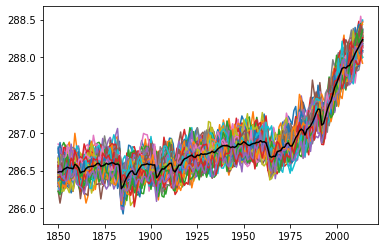

In [4]:
for run in T.keys():
    pl.plot(np.arange(1850,2015), T[run])
pl.plot(np.arange(1850,2015), T_mean, color='k')

In [14]:
# these are our var_t(epsilon_{e,t}) values
var_t_of_epsilon_e_t = np.ones(65)*np.nan
for i, run in enumerate(T.keys()):
    var_t_of_epsilon_e_t[i] = (np.var(T[run] - T_mean))

In [16]:
np.sqrt(np.mean(var_t_of_epsilon_e_t))

0.1100391953061718